In [1]:
import os
import numpy as np
from PIL import Image
import random
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
import cv2
import numpy as np

In [11]:
# 이미지 불러오기(한번만)
path = 'data/류승룡/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/류승룡/'+ A, res)

In [12]:
# 이미지 불러오기2(한번만)
path = 'data/오달수/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res2 = cv2.resize(img, dsize=(60,60), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/오달수/'+ A, res)

In [5]:
# 이미지 불러오기3(한번만)
path = 'data/이정재/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res3 = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/이정재/'+ A, res3)

In [54]:
# 이미지 불러오기3(한번만_포스터)
path = 'data/poster/'
file_list = os.listdir(path)

for A in file_list:
    if A == ".DS_Store":
        continue
    img = cv2.imread(path + A)
    res3 = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
    cv2.imwrite('data/poster/'+ A, res3)

In [3]:
## 이미지 불러와서 이미지 크기를 60*90 으로 이미지 조절
# 위 함수들 자동화함
# data_after 전체파일들을 그대로 data에 잘라 붙여넣기
all_files = os.listdir("data/")
all_files.remove(".DS_Store")

#people = ["오달수","류승룡","송강호","정진영","유해진","하정우","설경구","이정재","전지현","황정민","김향기","마동석"]

for x in all_files:
    path = 'data/'+x+'/'
    file_list = os.listdir(path)

    for A in file_list:
        if A == ".DS_Store":
            continue
        img = cv2.imread(path + A)
        res = cv2.resize(img, dsize=(60, 60), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(path + A, res)

In [3]:
## classes 순서를 잘 봐야 한다 
c = os.listdir("data")
c.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
c.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
print(c)

['이정재', '정진영', '마동석', '유해진', '황정민', '류승룡', '설경구', '오달수', '김향기', '하정우', '송강호', '전지현']


In [4]:
# 데이터를 떠먹여 줄 클래스를 제작합니다.
class DataReader():
    def __init__(self):
        self.label = ['이정재', '정진영', '마동석', '유해진', '황정민', '류승룡', '설경구', '오달수', '김향기', '하정우', '송강호', '전지현']
        
        self.train_X = []
        self.train_Y = []
        self.test_X = []
        self.test_Y = []
        
        self.read_images()

    def read_images(self):
        data = []
        print("Reading Data...")
        classes = os.listdir("data") # 순서에 따라 0~ 부여해야하므로 중요
        classes.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
        classes.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
        for i, cls in enumerate(classes):
            print("Opening " + cls + "/")
            Path = os.listdir("data/" + cls)
            if ".DS_Store" in Path:
                Path.remove(".DS_Store")
            for el in Path:
                img = Image.open("data/" + cls + "/" + el)
                data.append((np.asarray(img), i))
                img.close()

        random.shuffle(data)

        for i in range(len(data)):
            if i < 0.8*len(data):
                self.train_X.append(data[i][0])
                self.train_Y.append(data[i][1])
            else:
                self.test_X.append(data[i][0])
                self.test_Y.append(data[i][1])

        self.train_X = np.asarray(self.train_X) / 255.0
        self.train_Y = np.asarray(self.train_Y)
        self.test_X = np.asarray(self.test_X) / 255.0
        self.test_Y = np.asarray(self.test_Y)

        # 데이터 읽기가 완료되었습니다.
        # 읽어온 데이터의 정보를 출력합니다.
        print("\n\nData Read Done!")
        print("Training X Size : " + str(self.train_X.shape))
        print("Training Y Size : " + str(self.train_Y.shape))
        print("Test X Size : " + str(self.test_X.shape))
        print("Test Y Size : " + str(self.test_Y.shape) + '\n\n')

    def show_processed_images(self):
        plt.figure(figsize=(10, 10))
        for i in range(25):
            plt.subplot(5, 5, i + 1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_X[i], cmap=plt.cm.binary)
            plt.xlabel(self.label[int(self.train_Y[i])])
        plt.show()

In [5]:
def draw_graph(history):
    train_history = history.history["loss"]
    validation_history = history.history["val_loss"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Loss History")
    plt.xlabel("EPOCH")
    plt.ylabel("LOSS Function")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("train_history.png")

    train_history = history.history["accuracy"]
    validation_history = history.history["val_accuracy"]
    fig = plt.figure(figsize=(8, 8))
    plt.title("Accuracy History")
    plt.xlabel("EPOCH")
    plt.ylabel("Accuracy")
    plt.plot(train_history, "red")
    plt.plot(validation_history, 'blue')
    fig.savefig("accuracy_history.png")

In [6]:
# 데이터를 읽어옵니다.
dr = DataReader()

Reading Data...
Opening 이정재/
Opening 정진영/
Opening 마동석/
Opening 유해진/
Opening 황정민/
Opening 류승룡/
Opening 설경구/
Opening 오달수/
Opening 김향기/
Opening 하정우/
Opening 송강호/
Opening 전지현/


Data Read Done!
Training X Size : (1375, 90, 60, 3)
Training Y Size : (1375,)
Test X Size : (343, 90, 60, 3)
Test Y Size : (343,)




In [3]:
# 인공신경망을 제작합니다.
# 노가다 끝 신경망
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(12, activation="softmax")
])

Metal device set to: Apple M1


2022-01-28 09:41:34.773036: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-28 09:41:34.773208: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
import tensorflow as tf
model = tf.keras.models.load_model('poster2.h5')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 58, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 44, 29, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 44, 29, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 27, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 21, 13, 64)        0

In [8]:
# 인공신경망을 컴파일합니다.
model.compile(optimizer='adam', metrics=['accuracy'],
              loss='sparse_categorical_crossentropy')

In [9]:
# 몇 에포크 만큼 학습을 시킬 것인지 결정합니다.
EPOCHS = 50  # 예제 기본값은 50

In [10]:
# 인공신경망을 학습시킵니다.
print("\n\n************ TRAINING START ************ ")
history = model.fit(dr.train_X, dr.train_Y, epochs=EPOCHS,
                    validation_data=(dr.test_X, dr.test_Y))



************ TRAINING START ************ 
Epoch 1/50


2022-01-06 10:32:28.170744: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-06 10:32:28.411089: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - ETA: 0s - loss: 2.4797 - accuracy: 0.0844

2022-01-06 10:32:29.978365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


43/43 [==============================] - 2s 35ms/step - loss: 2.4797 - accuracy: 0.0844 - val_loss: 2.4732 - val_accuracy: 0.1283
Epoch 2/50
43/43 [==============================] - 1s 29ms/step - loss: 2.4708 - accuracy: 0.0996 - val_loss: 2.4714 - val_accuracy: 0.1283
Epoch 3/50
43/43 [==============================] - 1s 29ms/step - loss: 2.4591 - accuracy: 0.1185 - val_loss: 2.4323 - val_accuracy: 0.1953
Epoch 4/50
43/43 [==============================] - 1s 29ms/step - loss: 2.3347 - accuracy: 0.1782 - val_loss: 2.2135 - val_accuracy: 0.2566
Epoch 5/50
43/43 [==============================] - 1s 28ms/step - loss: 2.1973 - accuracy: 0.2291 - val_loss: 2.1365 - val_accuracy: 0.2770
Epoch 6/50
43/43 [==============================] - 1s 28ms/step - loss: 2.0087 - accuracy: 0.3084 - val_loss: 1.9719 - val_accuracy: 0.3324
Epoch 7/50
43/43 [==============================] - 1s 28ms/step - loss: 1.8739 - accuracy: 0.3520 - val_loss: 1.7460 - val_accuracy: 0.3965
Epoch 8/50
43/43 [======

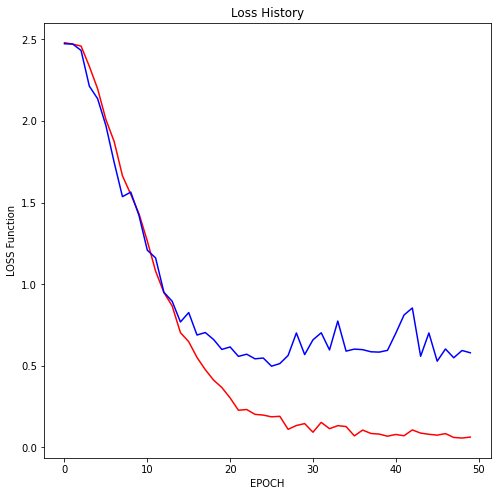

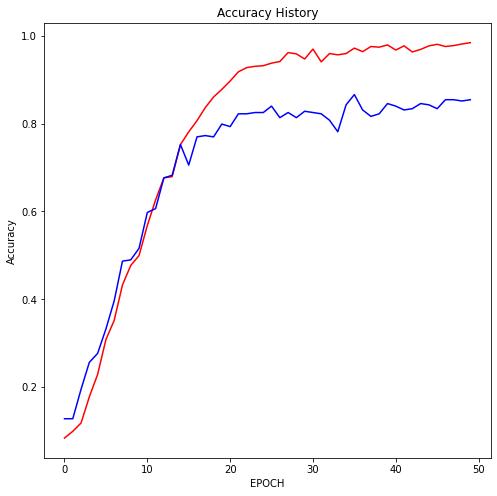

In [11]:
# 학습 결과를 그래프로 출력합니다.
draw_graph(history)

In [12]:
model.save('poster2.h5')

In [67]:
########예찬님 완성 모델 로드 #################

import tensorflow as tf
model = tf.keras.models.load_model('yechan2.h5')

In [68]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 58, 58, 16)        448       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 29, 29, 16)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 29, 29, 16)        0         
                                                                 
 conv2d_33 (Conv2D)          (None, 27, 27, 32)        4640      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_41 (Dropout)        (None, 13, 13, 32)       

In [71]:
## 예측용 데이터 불러오기
path2 = 'data/poster/'
file_list = os.listdir(path2)
data2 = []
count = 1
for A in file_list:
    if A == ".DS_Store":
        continue
    poster = Image.open(path2+A)
    data2.append(np.array(poster))
    poster.close()

## 이미지를 resize 해서 다시 실행하면 위 코드 다시 실행해봐도 array(array()) 이런 문제가 발생하지 않음!
## ㄴopen 말고 cv2.imread() 로 읽어서 해결된듯

In [72]:
data2 = np.asarray(data2)/255.0

In [12]:
for x in file_list:
    print(x)

택시운전사_1.jpg
극한직업_2.jpg
극한직업_3.jpg
신과함께_인과연_1.jpg
신과함께_인과연_3.jpg
암살_5.jpg
극한직업_1.jpg
암살_4.jpg
신과함께_인과연_2.jpg
.DS_Store
부산행_3.jpg
극한직업_4.jpg
극한직업_5.jpg
암살_1.jpg
부산행_2.jpg
신과함께_인과연_5.jpg
암살_3.jpg
암살_2.jpg
부산행_1.jpg
신과함께_인과연_4.jpg
광해_3.jpg
7번방_2.jpg
신과함께_죄와벌_3.jpg
신과함께_죄와벌_2.jpg
7번방_3.jpg
광해_2.jpg
7번방_1.jpg
신과함께_죄와벌_1.jpg
광해_1.jpg
7번방_4.jpg
7번방_5.jpg
신과함께_죄와벌_4.jpg
변호인_2.jpg
변호인_1.jpg


In [69]:
predictions2 = model.predict(data2)

2022-01-07 07:54:37.154837: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
#이정재 0
#정진영 1
#마동석 2
#유해진 3
#황정민 4
#류승룡 5
#설경구 6
#오달수 7
#김향기 8
#하정우 9
#송강호 10
#전지현 11

In [70]:
# 리스트 순서에 맞게 
print(file_list)
actor = {0:"이정재",1:"정진영",2:"마동석",3:"유해진",4:"황정민",5:"류승룡",6:"설경구",7:"오달수",8:"김향기",
        9:"하정우",10:"송강호",11:"전지현"}
for i, x in enumerate(predictions2):
    count = 0
    for y in x:
        if y > 0.9:
            count += 1
    if count > 0:
        print(str(i)+"번째 사진: "+file_list[i], actor[np.argmax(x)])            
    
# y[0~11]까지 전부 0.8 미만이면 출력하지말기

# y[0~11]까지 하나라도 0.8이상이면 출력하기
#print(np.argmax(x))

['택시운전사_1.jpg', '극한직업_2.jpg', '극한직업_3.jpg', '신과함께_인과연_1.jpg', '신과함께_인과연_3.jpg', '암살_5.jpg', '극한직업_1.jpg', '암살_4.jpg', '신과함께_인과연_2.jpg', '.DS_Store', '부산행_3.jpg', '극한직업_4.jpg', '극한직업_5.jpg', '암살_1.jpg', '부산행_2.jpg', '신과함께_인과연_5.jpg', '암살_3.jpg', '암살_2.jpg', '부산행_1.jpg', '신과함께_인과연_4.jpg', '광해_3.jpg', '7번방_2.jpg', '신과함께_죄와벌_3.jpg', '신과함께_죄와벌_2.jpg', '7번방_3.jpg', '광해_2.jpg', '7번방_1.jpg', '신과함께_죄와벌_1.jpg', '광해_1.jpg', '7번방_4.jpg', '7번방_5.jpg', '신과함께_죄와벌_4.jpg', '변호인_2.jpg', '변호인_1.jpg']
5번째 사진: 암살_5.jpg 유해진
8번째 사진: 신과함께_인과연_2.jpg 설경구
11번째 사진: 극한직업_4.jpg 설경구
14번째 사진: 부산행_2.jpg 마동석
15번째 사진: 신과함께_인과연_5.jpg 하정우
16번째 사진: 암살_3.jpg 송강호
19번째 사진: 신과함께_인과연_4.jpg 류승룡
22번째 사진: 신과함께_죄와벌_3.jpg 마동석
25번째 사진: 광해_2.jpg 오달수
28번째 사진: 광해_1.jpg 마동석


In [19]:
for i, x in enumerate(predictions2):
    print(i,x)

0 [2.63448273e-05 1.95662994e-02 1.57698396e-05 2.67538038e-04
 1.41475375e-05 9.66618791e-06 2.84652933e-02 8.42470690e-05
 5.57840765e-02 1.77400857e-02 8.78024757e-01 1.83405132e-06]
1 [9.04502034e-01 6.22426342e-06 1.43242476e-08 7.53212726e-06
 3.14461044e-03 3.59375804e-06 4.55994494e-02 1.02030015e-07
 1.54502181e-04 4.64150012e-02 1.72752863e-07 1.66721482e-04]
2 [1.7647415e-04 1.0269237e-03 3.9411510e-09 2.5246018e-07 1.7786748e-04
 1.6624836e-03 1.3092136e-01 4.7917905e-07 1.1524364e-07 8.6603391e-01
 2.7881779e-09 7.5556457e-08]
3 [2.3670373e-03 9.8822242e-01 2.0896747e-13 2.4376741e-09 9.3796095e-03
 5.8704941e-08 1.9794420e-06 7.0646403e-14 2.2247166e-08 2.9002711e-05
 1.5198768e-11 1.1234562e-09]
4 [3.5062884e-13 4.3005869e-03 1.1029979e-07 5.5605710e-06 2.4355291e-09
 7.9829915e-10 2.3892563e-10 4.5647357e-12 1.7699094e-10 1.2110020e-06
 9.9569255e-01 3.0027126e-17]
5 [1.9774124e-01 1.5707951e-04 2.7535787e-08 3.4690937e-01 3.4991693e-01
 2.8084960e-06 1.6153537e-02 8.89

In [52]:
predictions2[0].argmax()

1

In [ ]:
############### 그 외 ####################

In [52]:
## 저장한 모델을 다시 불러와보자

from keras.models import load_model
model = load_model('poster.h5')

Metal device set to: Apple M1


2022-01-07 07:50:25.730289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-07 07:50:25.730855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [74]:
classes2 = os.listdir("data") # 순서에 따라 0~ 부여해야하므로 중요
classes2.remove(".DS_Store") #['.DS_Store', '류승룡', '오달수']
classes2.remove("poster") #포스터는 실제 예측데이터로 쓸거야!
for i, cls in enumerate(classes2):
    print(cls,i)
    '''Path = os.listdir("data/" + cls)
    if ".DS_Store" in Path:
        Path.remove(".DS_Store")
    for el in Path:
        img = Image.open("data/" + cls + "/" + el)
        data.append((np.asarray(img), i))
        img.close()'''

이정재 0
정진영 1
마동석 2
유해진 3
황정민 4
류승룡 5
설경구 6
오달수 7
김향기 8
하정우 9
송강호 10
전지현 11
